# Aprendizagem de Maquina

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/erivandosena/ml-knn-example/blob/main/AprendizagemMaquina-sample.ipynb)

In [29]:
%pip install numpy pandas scikit-learn matplotlib seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Get information and statical on the dataset
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
print(df.info())
print(df.describe())

# Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [32]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

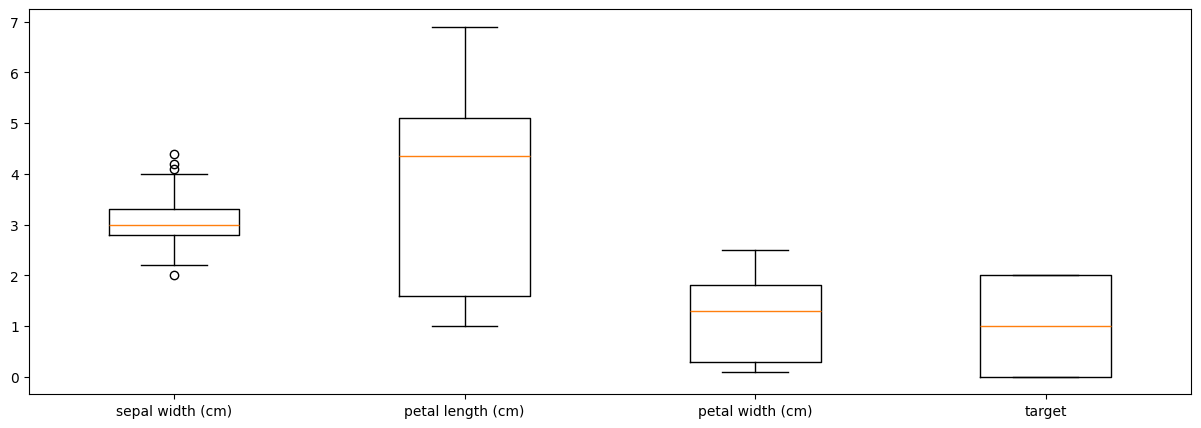

In [34]:
# View the dataset
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(df.iloc[:,1:11])
ax.set_xticks(range(1,df.iloc[:,1:11].shape[1]+1),df.iloc[:,1:11].columns)

plt.show()

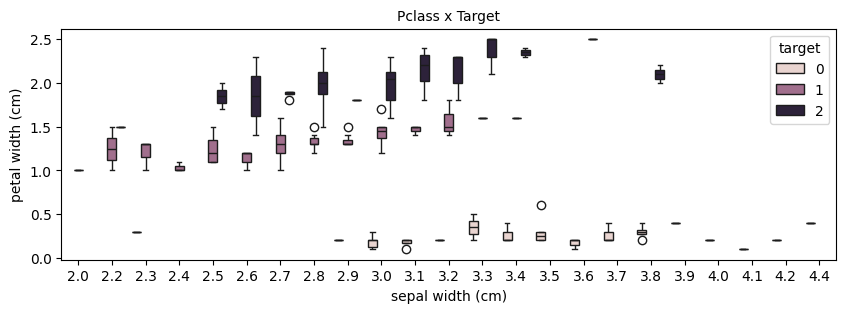

In [38]:
# View relation between the variables
fig, ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=df,x='sepal width (cm)',y='petal width (cm)',hue='target')
ax.set_title('Pclass x Target', fontsize=10)

plt.show()

In [19]:
# Initiating and training the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
# Making forecast on dataset of test
y_pred_knn = knn_model.predict(X_test)

In [20]:
# Logistic regression
rl_model = LogisticRegression(random_state=42,max_iter=1000)
rl_model = rl_model.fit(X_train,y_train)
y_pred_rl = rl_model.predict(X_test)

In [21]:
# Tree classifier
ac_model = tree.DecisionTreeClassifier(random_state=42)
ac_model = ac_model.fit(X_train,y_train)
y_pred_ac = ac_model.predict(X_test)

In [22]:
# Evaluating the accuracy of the models
accuracy_ac = accuracy_score(y_test, y_pred_ac)
print(f'Acurácia por árvore de classificação: {accuracy_ac:.2f}')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia por K-NN: {accuracy_knn:.2f}')

accuracy_rl = accuracy_score(y_test, y_pred_rl)
print(f'Acurácia por Regressão Logística: {accuracy_rl:.2f}')

Acurácia por árvore de classificação: 1.00
Acurácia por K-NN: 1.00
Acurácia por Regressão Logística: 1.00


In [26]:
# Create the DataFrame
as_df = pd.DataFrame({
    'Models': ['arvore','knn','reg. log.'],
    'Results': [accuracy_ac,accuracy_knn,accuracy_rl]
})

as_df

,Models,Initial
0,arvore,1.0
1,knn,1.0
2,reg. log.,1.0


In [25]:
# Evaluating the confusion matrix of the models to k-NN
confusion_matrix(y_test, y_pred_knn)

# To logistic regression
confusion_matrix(y_test, y_pred_rl)

# To tree classifier
confusion_matrix(y_test, y_pred_ac)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

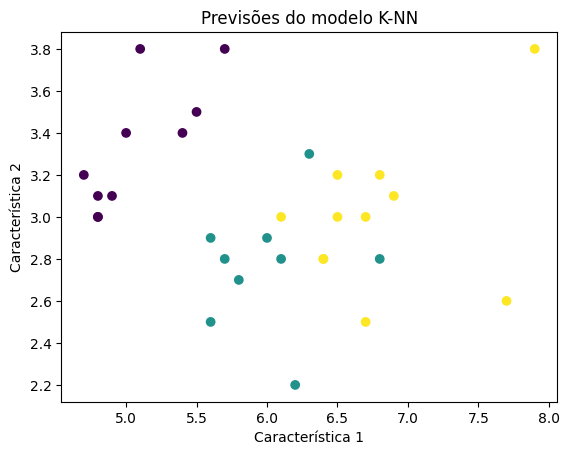

In [37]:
# Viewing predictions to k-nn
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn, cmap='viridis')
plt.title('Previsões do modelo K-NN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()